# ECON 323 PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import folium as fm

In [6]:



place_name = "Yokohama, Japan"

tags = {'railway': ['station']}
    #'public_transport': ['stop_position', 'station']}
# 'public_transport': ['stop_position', 'platform', 'station']}
    # 'highway': 'bus_stop',
    #'railway': ['station', 'tram_stop']}
    # 'amenity': 'bus_station'}

pt_stops = ox.features_from_place(place_name, tags=tags)


G_walk = ox.graph_from_place(place_name, network_type="walk")


edges = ox.graph_to_gdfs(G_walk, nodes=False, edges=True)




In [7]:
pt_stops

geometry   name  \
element id                                                                      
node    172522965                           POINT (139.65416 35.48688)    新子安   
        263267206                           POINT (139.53143 35.35431)     大船   
        263271899                           POINT (139.64512 35.48464)     子安   
        263274493                              POINT (139.64 35.48143)  神奈川新町   
        263274999                            POINT (139.6232 35.46621)     横浜   
...                                                                ...    ...   
        11329681981                         POINT (139.61742 35.50723)    新横浜   
        12209234608                         POINT (139.49383 35.53209)    長津田   
        12209234609                         POINT (139.49393 35.53191)    長津田   
way     183535997    POLYGON ((139.5183 35.4057, 139.51828 35.40568...    踊場駅   
        267917213    POLYGON ((139.49971 35.41434, 139.49975 35.414...    立場駅   

                                name:en name:ja name:ja_kana  \
element id                                                     
node    172522965           Shin-Koyasu     新子安        しんこやす   
        263267206                 Ōfuna     NaN          NaN   
        263271899                Koyasu      子安          こやす   
        263274493    Kanagawa-shimmachi   神奈川新町     かながわしんまち   
        263274999              Yokohama      横浜          NaN   
...                                 ...     ...          ...   
        11329681981       Shin-Yokohama     新横浜       しんよこはま   
        12209234608           Nagatsuta     長津田          NaN   
        12209234609           Nagatsuta     長津田          NaN   
way     183535997                   NaN     NaN          NaN   
        267917213                   NaN     NaN          NaN   

                             name:ja_rm  name:ko    name:ru  \
element id                                                    
node    172522965           Shin-Koyasu     신코야스  Син-Коясу   
        263267206                   NaN      NaN      Офуна   
        263271899                Koyasu      고야스        NaN   
        263274493    Kanagawa-shimmachi  가나가와신마치        NaN   
        263274999                   NaN     요코하마        NaN   
...                                 ...      ...        ...   
        11329681981       Shin-Yokohama      NaN        NaN   
        12209234608                 NaN     나가쓰다   Нагацута   
        12209234609                 NaN     나가쓰다   Нагацута   
way     183535997                   NaN      NaN        NaN   
        267917213                   NaN      NaN        NaN   

                                        operator public_transport  ...  \
element id                                                         ...   
node    172522965                        東日本旅客鉄道          station  ...   
        263267206                            NaN          station  ...   
        263271899                         京浜急行電鉄          station  ...   
        263274493    京浜急行電鉄 (Keikyu Corporation)          station  ...   
        263274999                         京浜急行電鉄          station  ...   
...                                          ...              ...  ...   
        11329681981                          NaN          station  ...   
        12209234608                       横浜高速鉄道          station  ...   
        12209234609                       東京急行電鉄          station  ...   
way     183535997                            NaN          station  ...   
        267917213                            NaN          station  ...   

                    baby_feeding operator:type operator:wikidata layer line  \
element id                                                                    
node    172522965            NaN           NaN               NaN   NaN  NaN   
        263267206            NaN           NaN               NaN   NaN  NaN   
        263271899            NaN           NaN               NaN   NaN  NaN 

In [17]:
list(pt_stops.columns.values)

['geometry',
 'name',
 'name:en',
 'name:ja',
 'name:ja_kana',
 'name:ja_rm',
 'name:ko',
 'name:ru',
 'operator',
 'public_transport',
 'railway',
 'wikidata',
 'wikipedia',
 'KSJ2:LIN',
 'KSJ2:STN',
 'name:de',
 'name:fr',
 'name:it',
 'name:ja-Hira',
 'name:ja-Latn',
 'gauge',
 'name:es',
 'operator:en',
 'operator:ja',
 'ref',
 'source',
 'source_ref',
 'note',
 'contact:website',
 'name:ja-Kana',
 'wheelchair',
 'train',
 'name:zh-Hans',
 'wikimedia_commons',
 'light_rail',
 'station',
 'alt_name:ko',
 'network',
 'network:en',
 'network:ja',
 'network:wikidata',
 'subway',
 'KSJ2:RAS',
 'KSJ2:segment',
 'note:ja',
 'platforms',
 'website',
 'alt_name',
 'highspeed',
 'name:uk',
 'toilets:wheelchair',
 'phone',
 'air_conditioning',
 'internet_access',
 'start_date',
 'name:kr',
 'name:zh',
 'wikipedia:en',
 'baby_feeding',
 'operator:type',
 'operator:wikidata',
 'layer',
 'line',
 'fixme',
 'old_name',
 'alt_name:en',
 'building',
 'building:levels']

In [26]:
pt_stops_points = pt_stops[pt_stops.geometry.geom_type == "Point"]

pt_stops_filtered = pt_stops_points[["geometry", "name","name:en","public_transport","operator"]]

pt_stops_filtered

geometry     name             name:en  \
element id                                                                     
node    172522965    POINT (139.65416 35.48688)      新子安         Shin-Koyasu   
        263267206    POINT (139.53143 35.35431)       大船               Ōfuna   
        263271899    POINT (139.64512 35.48464)       子安              Koyasu   
        263274493       POINT (139.64 35.48143)    神奈川新町  Kanagawa-shimmachi   
        263274999     POINT (139.6232 35.46621)       横浜            Yokohama   
...                                         ...      ...                 ...   
        10108140342   POINT (139.6361 35.53585)      新綱島     Shin-Tsunashima   
        10312940095   POINT (139.5896 35.48341)  横浜羽沢（貨）                 NaN   
        11329681981  POINT (139.61742 35.50723)      新横浜       Shin-Yokohama   
        12209234608  POINT (139.49383 35.53209)      長津田           Nagatsuta   
        12209234609  POINT (139.49393 35.53191)      長津田           Nagatsuta   

                    public_transport                     operator  
element id                                                         
node    172522965            station                      東日本旅客鉄道  
        263267206            station                          NaN  
        263271899            station                       京浜急行電鉄  
        263274493            station  京浜急行電鉄 (Keikyu Corporation)  
        263274999            station                       京浜急行電鉄  
...                              ...                          ...  
        10108140342          station                          NaN  
        10312940095          station                          NaN  
        11329681981          station                          NaN  
        12209234608          station                       横浜高速鉄道  
        12209234609          station                       東京急行電鉄  

[161 rows x 5 columns]

In [27]:
pt_stops_filtered["lon"] = pt_stops_filtered.geometry.x
pt_stops_filtered["lat"] = pt_stops_filtered.geometry.y


pt_stops_lonlag = pt_stops_filtered.drop(columns='geometry')


pt_stops_lonlag.to_csv("pt_stops_yokohama.csv", index=False)

c:\Users\utaha\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\utaha\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


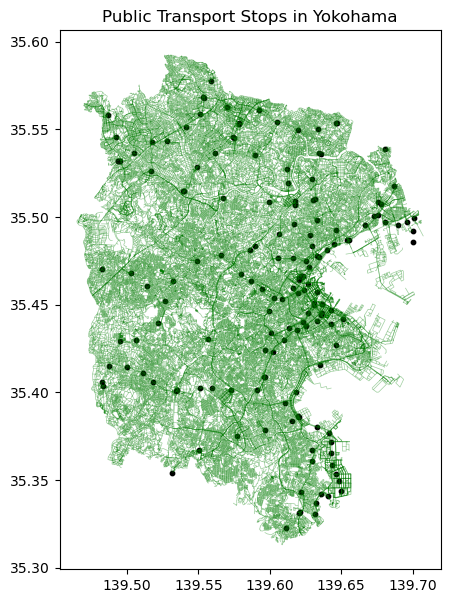

In [28]:

fig, ax = plt.subplots(figsize=(7,7))

edges.plot(ax=ax, color="green", linewidth=0.5, alpha=0.2, label="Street Network")

pt_stops.plot(ax=ax, color="black", markersize=10, label="Public Transport Stops")


plt.title("Public Transport Stops in Yokohama")
plt.show()

In [5]:
current_place = "Vancouver, Canada"

tags = {
    'public_transport': ['stop_position', 'platform', 'station'],
    'highway': 'bus_stop',
    'railway': ['station', 'tram_stop'],
    'amenity': 'bus_station'
}

stops = ox.features_from_place(current_place, tags=tags)


walks = ox.graph_from_place(current_place, network_type="walk")


Vedges = ox.graph_to_gdfs(walks, nodes=False, edges=True)

KeyboardInterrupt: 

In [ ]:
stops

geometry  \
element id                                                              
node    25325837                          POINT (-123.07897 49.26582)   
        25325841                          POINT (-123.04556 49.25893)   
        25751159                          POINT (-123.10044 49.27315)   
        370490166                         POINT (-123.06967 49.27373)   
        393643280                         POINT (-123.03288 49.26079)   
...                                                               ...   
way     1021921415  POLYGON ((-123.04612 49.24455, -123.04576 49.2...   
        1197236492  POLYGON ((-123.13336 49.20309, -123.13336 49.2...   
        1205584429  POLYGON ((-123.02604 49.28149, -123.02604 49.2...   
        1252115056  POLYGON ((-123.14098 49.21365, -123.1405 49.21...   
        1349064239  POLYGON ((-123.1204 49.26642, -123.12044 49.26...   

                                                name    network  \
element id                                                        
node    25325837                           VCC–Clark  TransLink   
        25325841                             Renfrew  TransLink   
        25751159           Main Street–Science World  Translink   
        370490166   Commercial Dr (SB) at William St  Translink   
        393643280                             Rupert  TransLink   
...                                              ...        ...   
way     1021921415               29th Avenue Station  TransLink   
        1197236492                               NaN        NaN   
        1205584429                               NaN        NaN   
        1252115056                  63rd Avenue Loop  Translink   
        1349064239                    Heather Square  Translink   

                                         operator public_transport  railway  \
element id                                                                    
node    25325837         BC Rapid Transit Company    stop_position     stop   
        25325841                              NaN    stop_position     stop   
        25751159    BC Rapid Transit Company Ltd.          station  station   
        370490166      Coast Mountain Bus Company         platform      NaN   
        393643280                             NaN    stop_position     stop   
...                                           ...              ...      ...   
way     1021921415     Coast Mountain Bus Company          station      NaN   
        1197236492                            NaN         platform      NaN   
        1205584429                            NaN         platform      NaN   
        1252115056     Coast Mountain Bus Company          station      NaN   
        1349064239     Coast Mountain Bus Company          station      NaN   

                   railway:ref    ref subway  addr:city  ... disused:highway  \
element id                                               ...                   
node    25325837           VCI  60824    yes        NaN  ...             NaN   
        25325841           REI    NaN    yes        NaN  ...             NaN   
        25751159            MN    NaN    yes  Vancouver  ...             NaN   
        370490166          NaN  51238    NaN        NaN  ...             NaN   
        393643280           RU    NaN    yes        NaN  ...             NaN   
...                        ...    ...    ...        ...  ...             ...   
way     1021921415         NaN    NaN    NaN        NaN  ...             NaN   
        1197236492         NaN    NaN    NaN        NaN  ...             NaN   
        1205584429         NaN    NaN    NaN        NaN  ...             NaN   
        1252115056         NaN    NaN    NaN        NaN  ...             NaN   
        1349064239         NaN    NaN    NaN        NaN  ...             NaN   

                   area level passenger_information_display:speech_output  \
element id                                                                  
node    25325837

C:\Users\utaha\AppData\Local\Temp\ipykernel_50380\498808188.py:9: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


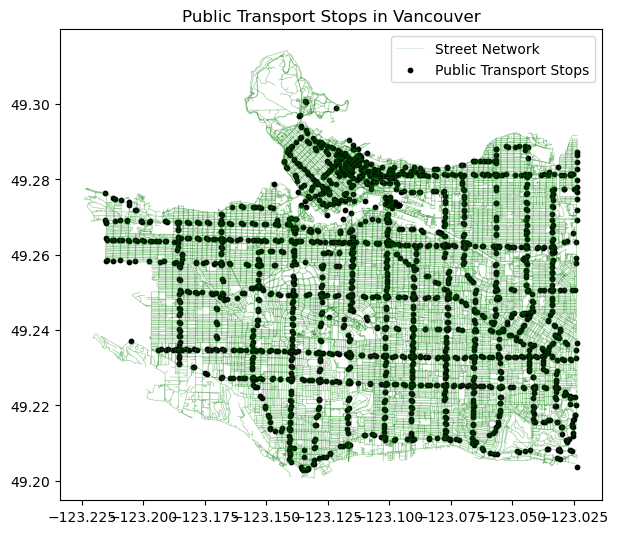

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

Vedges.plot(ax=ax, color="green", linewidth=0.5, alpha=0.2, label="Street Network")

stops.plot(ax=ax, color="black", markersize=10, label="Public Transport Stops")


plt.title("Public Transport Stops in Vancouver")
plt.legend()
plt.show()